In [10]:
import os
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from tools.utils.settings import DefaultPath as defpath

In [19]:
test_dir = defpath.data_path.josie_tests + '/full'
results_dir = test_dir + '/results'

k = 10
algorithms = ['josie', 'lshforest']
modes = ['set', 'bag']

solvers = dict()

for algorithm in algorithms:
    for mode in modes:
        fname = f"{results_dir}/a{algorithm}_m{mode}_k{k}_extracted.csv"

        if not os.path.exists(fname):
            continue
        solvers[(algorithm, mode)] = pd.read_csv(fname).convert_dtypes()

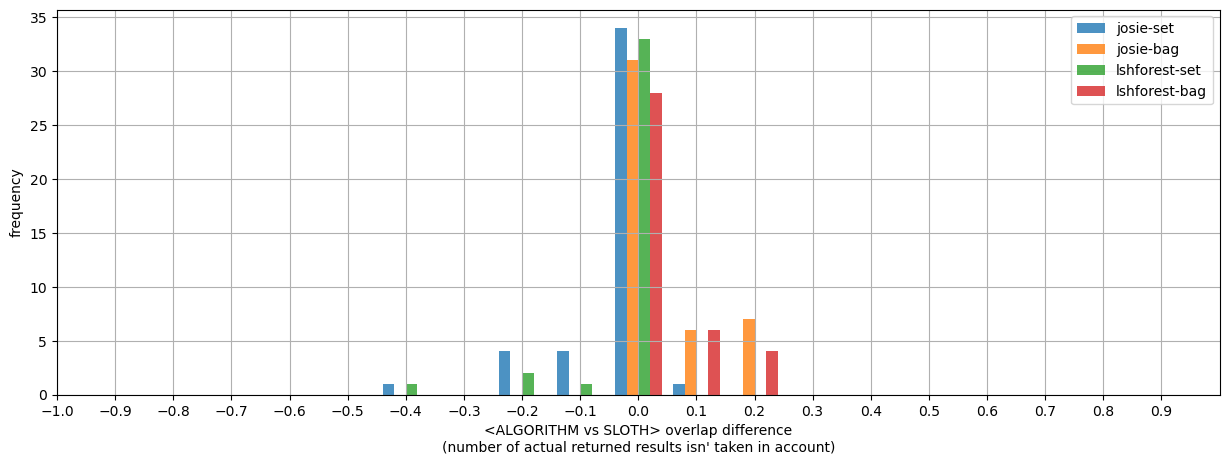

In [30]:
fig, ax = plt.subplots(1, 1, sharey='row', figsize=(15, 5))
xmin, xmax = -1, 1

ax.hist([res['difference_overlap_norm'] for _, res in solvers.items()], 
         bins=np.arange(xmin, xmax, 0.1), alpha=0.8, 
         label=[f'{solver[0]}-{solver[1]}' for solver, _ in solvers.items()],
         align='left')
ax.set_xlim(xmin, xmax)
ax.set_xticks(np.arange(xmin, xmax, 0.1))
ax.grid()
ax.set_xlabel('<ALGORITHM vs SLOTH> overlap difference\n(number of actual returned results isn\' taken in account)')
ax.set_ylabel('frequency')


plt.legend()
plt.show()